In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/bangkit-2020-dps04-us-test001/aksara-jawa-v5.zip \
    -O /tmp/aksara-jawa-v5.zip

--2020-06-07 02:39:27--  https://storage.googleapis.com/bangkit-2020-dps04-us-test001/aksara-jawa-v5.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194968769 (186M) [application/zip]
Saving to: ‘/tmp/aksara-jawa-v5.zip’

/tmp/aksara-jawa-v5 100%[===================>] 185.94M  89.9MB/s    in 2.1s    

2020-06-07 02:39:30 (89.9 MB/s) - ‘/tmp/aksara-jawa-v5.zip’ saved [194968769/194968769]



In [0]:
#Unzip files dataset
import os
import zipfile

local_zip = '/tmp/aksara-jawa-v5.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/aksara-jawa/')
zip_ref.close()

In [0]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import time

In [0]:
#Hyperparameter
HEIGHT = 64
WIDTH = 64

BATCH_SIZE=8
NUM_CLASSES = 20
EPOCHS = 30

### Setup dataset Generator

Using TensorFlow backend.


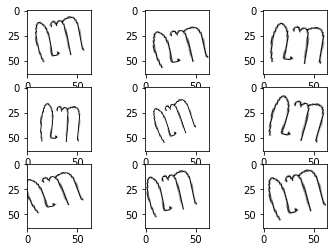

In [5]:
# example of image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('/tmp/aksara-jawa/newdatasetaug/newtesting/ba/ba17.mine3.b.png', target_size=(HEIGHT, WIDTH))
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
# datagen = ImageDataGenerator(height_shift_range=0.5)
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    rotation_range=20,
    fill_mode='nearest')


# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [6]:
TRAINING_DIR = "/tmp/aksara-jawa/newdatasetaug/newtraining/"
training_datagen = ImageDataGenerator(
    validation_split=.2,
    rescale = 1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    rotation_range=20,
    fill_mode='nearest')

TEST_DIR = "/tmp/aksara-jawa/newdatasetaug/newtesting/"
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    subset='training',
    target_size=(HEIGHT, WIDTH),
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

validation_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    subset='validation',
    target_size=(HEIGHT, WIDTH),
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 1161 images belonging to 20 classes.
Found 280 images belonging to 20 classes.
Found 839 images belonging to 20 classes.


### Create Model

In [7]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(HEIGHT, WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    
    # 64 neuron hidden layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint 

checkpointer = ModelCheckpoint(filepath='weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

time_start = time.time()#measure training time
history = model.fit(train_generator, epochs=EPOCHS, validation_data = validation_generator, verbose = 1, callbacks=[checkpointer])
time_end = time.time()

Epoch 1/30
146/146 [==============================] - ETA: 0s - loss: 3.0061 - accuracy: 0.0474
Epoch 00001: val_loss improved from inf to 2.97067, saving model to weights.best.from_scratch.hdf5
146/146 [==============================] - 19s 133ms/step - loss: 3.0061 - accuracy: 0.0474 - val_loss: 2.9707 - val_accuracy: 0.1000
Epoch 2/30
146/146 [==============================] - ETA: 0s - loss: 2.8099 - accuracy: 0.1404
Epoch 00002: val_loss improved from 2.97067 to 2.74547, saving model to weights.best.from_scratch.hdf5
146/146 [==============================] - 19s 132ms/step - loss: 2.8099 - accuracy: 0.1404 - val_loss: 2.7455 - val_accuracy: 0.1714
Epoch 3/30
146/146 [==============================] - ETA: 0s - loss: 2.4231 - accuracy: 0.2550
Epoch 00003: val_loss improved from 2.74547 to 2.51505, saving model to weights.best.from_scratch.hdf5
146/146 [==============================] - 19s 131ms/step - loss: 2.4231 - accuracy: 0.2550 - val_loss: 2.5150 - val_accuracy: 0.3000
Epoch

In [10]:
elapsed_time = time_end - time_start
print("Elapsed time (s): % 5.2f" %(elapsed_time)) 

Elapsed time (s):  585.47


In [11]:
model.load_weights('weights.best.from_scratch.hdf5') #load weight terbaik

model.save("aksara.h5")

# Melakukan test
model.evaluate(test_generator)

105/105 [==============================] - 10s 97ms/step - loss: 0.0390 - accuracy: 0.9833


[0.03899622708559036, 0.9833134412765503]

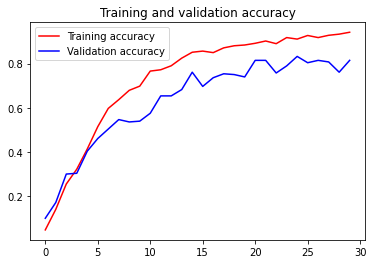

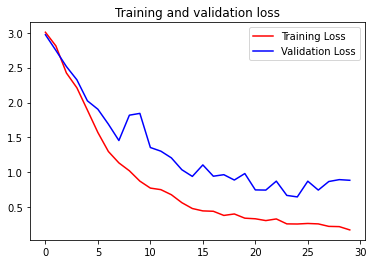

In [12]:
# Plot kurva akurasi
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

In [14]:
#lakukan test dengan gambar baru
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(HEIGHT, WIDTH))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(fn)
    print(classes)
    
    predicted_class_indices=np.argmax(classes,axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    predictions = [labels[k] for k in predicted_class_indices]
    print(predictions)



Saving ba49.mine2.png to ba49.mine2.png
Saving nga220.pred.png to nga220.pred.png
Saving ra164.pred.png to ra164.pred.png
ba49.mine2.png
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
['ba']
nga220.pred.png
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
['nga']
ra164.pred.png
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
['ra']


In [0]:
import os
train_ba_dir = os.path.join(TRAINING_DIR, 'ba')
train_ca_dir = os.path.join(TRAINING_DIR, 'ca')

train_ba_fnames = os.listdir( train_ba_dir )
train_ca_fnames = os.listdir( train_ca_dir )


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


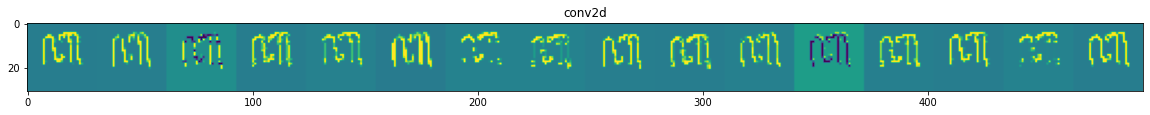

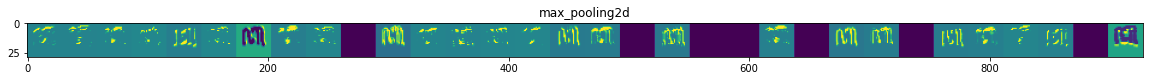

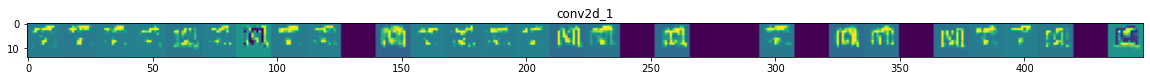

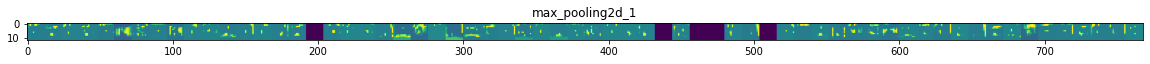

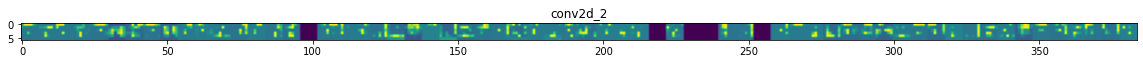

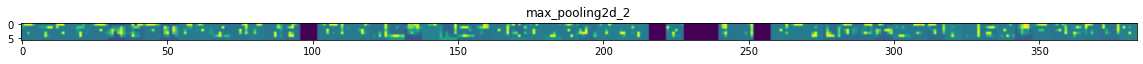

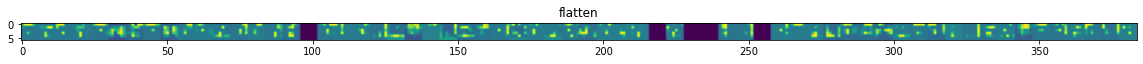

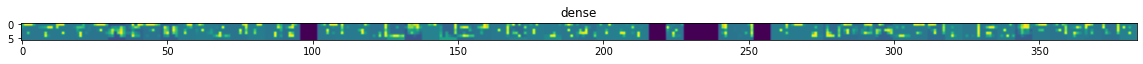

In [16]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image from the training set.
ba_img_files = [os.path.join(train_ba_dir, f) for f in train_ba_fnames]
ca_img_files = [os.path.join(train_ca_dir, f) for f in train_ca_fnames]

img_path = random.choice(ba_img_files + ca_img_files)
img = load_img(img_path, target_size=(HEIGHT, WIDTH))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]


# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
    if len(feature_map.shape) == 4:

        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))

        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 